# Plag - Liquid hygrometry
- This workbook shows how to perform Plag-Liq hygrometry, as well as demonstrating how to investigate sensitivity to pressure. 
- You can download the excel spreadsheet here: https://github.com/PennyWieser/Thermobar/blob/main/docs/Examples/Feldspar_Thermobarometry/Feldspar_Liquid.xlsx

### You need to install Thermobar once on your machine, if you haven't done this yet, uncomment the line below (remove the #)

In [1]:
#!pip install Thermobar

## first, load python things, set plotting parameters

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt
pd.options.display.max_columns = None

# This sets some plotting things
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1 
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels

## Loading plagioclase- liquid pairs

In [3]:
out_PL=pt.import_excel('Feldspar_Liquid.xlsx', sheet_name="Plag_Liquid")
# This extracts a dataframe of all inputs
my_input_PL=out_PL['my_input']
# This extracts a dataframe of plag compositions from the dictionary "out"
Plags=out_PL['Plags']
Liqs_PL=out_PL['Liqs']

## Lets check these inputs look good (e.g. not just a load of zeros)

In [4]:
display(Plags.head())
display(Liqs_PL.head())

,SiO2_Plag,TiO2_Plag,Al2O3_Plag,FeOt_Plag,MnO_Plag,MgO_Plag,CaO_Plag,Na2O_Plag,K2O_Plag,Cr2O3_Plag,Sample_ID_Plag
0,57.3,0.09,26.6,0.43,0.0,0.03,8.33,6.11,0.49,0.0,0
1,56.5,0.12,26.9,0.47,0.0,0.05,8.95,5.66,0.47,0.0,1
2,57.6,0.11,26.3,0.50,0.0,0.07,8.50,6.27,0.40,0.0,2
3,57.2,0.16,27.0,0.62,0.0,0.06,9.03,5.58,0.84,0.0,3
4,56.7,0.14,27.6,0.69,0.0,0.11,9.46,5.58,0.48,0.0,4


,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq
0,49.1,3.22,14.4,14.8,0.14,3.20,6.72,3.34,1.70,0.0,1.13,0.0,0.0,0.0,0.0,0.0,0
1,49.2,3.89,15.3,13.7,0.12,3.88,6.76,3.44,1.22,0.0,0.83,0.0,0.0,0.0,0.0,0.0,1
2,49.6,3.79,15.8,13.0,0.14,4.26,6.59,3.65,1.04,0.0,0.63,0.0,0.0,0.0,0.0,0.0,2
3,47.1,4.21,12.0,17.8,0.18,3.40,7.28,2.93,2.02,0.0,2.32,0.0,0.0,0.0,0.0,0.0,3
4,48.1,3.88,13.2,16.4,0.16,4.02,6.51,3.36,1.36,0.0,1.59,0.0,0.0,0.0,0.0,0.0,4


## Example 1 - Plagioclase-Liquid Hygrometry
- For these first examples, we enter plag comps and liquid comps, and specify a temperature (as with existing tools)

### 1a - Using equation H of Putirka (2005)
- Performing calculations at 1000 Celcius, and pressure stored in the P_GPa column of the inputted spreadsheet 

In [5]:
H_put2005=pt.calculate_fspar_liq_hygr(liq_comps=Liqs_PL, plag_comps=Plags, 
                                    equationH="H_Put2005_eqH",
                                    T=1000+273.15, P=my_input_PL['P_GPa']*10)
H_put2005.head()

,H2O_calc,Pass An-Ab Eq Test Put2008?,Delta_An,Delta_Ab,Delta_Or,Pred_An_EqE,Pred_Ab_EqF,Pred_Or_EqG,Obs_Kd_Ab_An,SiO2_Plag,TiO2_Plag,Al2O3_Plag,FeOt_Plag,MnO_Plag,MgO_Plag,CaO_Plag,Na2O_Plag,K2O_Plag,Cr2O3_Plag,Sample_ID_Plag,Si_Plag_cat_prop,Mg_Plag_cat_prop,Fet_Plag_cat_prop,Ca_Plag_cat_prop,Al_Plag_cat_prop,Na_Plag_cat_prop,K_Plag_cat_prop,Mn_Plag_cat_prop,Ti_Plag_cat_prop,Cr_Plag_cat_prop,sum,Si_Plag_cat_frac,Mg_Plag_cat_frac,Fet_Plag_cat_frac,Ca_Plag_cat_frac,Al_Plag_cat_frac,Na_Plag_cat_frac,K_Plag_cat_frac,Mn_Plag_cat_frac,Ti_Plag_cat_frac,Cr_Plag_cat_frac,An_Plag,Ab_Plag,Or_Plag,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,Cr2O3_Liq_mol_frac,Si_Liq_cat_frac,Mg_Liq_cat_frac,Mn_Liq_cat_frac,Fet_Liq_cat_frac,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Cr_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,P,T
0,3.686570,Low T: Yes,0.056252,0.141146,0.029165,0.360876,0.694802,0.000050,0.510102,57.3,0.09,26.6,0.43,0.0,0.03,8.33,6.11,0.49,0.0,0,0.953660,0.000744,0.005985,0.148545,0.521768,0.197164,0.010404,0.0,0.001127,0.0,1.839397,0.518464,0.000405,0.003254,0.080757,0.283663,0.107189,0.005656,0.0,0.000613,0.0,0.417129,0.553656,0.029215,49.1,3.22,14.4,14.8,0.14,3.20,6.72,3.34,1.70,0.0,1.13,0.0,0.0,0.0,0.0,0.0,0,0.549988,0.053436,0.001328,0.138640,0.080652,0.095052,0.036269,0.012146,0.027130,0.005358,0.0,0.478739,0.046513,0.001156,0.120680,0.070204,0.165477,0.063141,0.021146,0.023616,0.009328,0.0,0.278194,0.278194,10.0,1273.15
1,3.522063,Low T: Yes,0.083157,0.227579,0.028164,0.369968,0.746123,0.000168,0.455475,56.5,0.12,26.9,0.47,0.0,0.05,8.95,5.66,0.47,0.0,1,0.940345,0.001241,0.006542,0.159601,0.527653,0.182643,0.009979,0.0,0.001502,0.0,1.829506,0.513989,0.000678,0.003576,0.087237,0.288413,0.099832,0.005455,0.0,0.000821,0.0,0.453125,0.518543,0.028332,49.2,3.89,15.3,13.7,0.12,3.88,6.76,3.44,1.22,0.0,0.83,0.0,0.0,0.0,0.0,0.0,1,0.545500,0.064131,0.001127,0.127030,0.080306,0.099965,0.036975,0.008628,0.032442,0.003896,0.0,0.474569,0.055792,0.000980,0.110512,0.069864,0.173933,0.064334,0.015012,0.028224,0.006778,0.0,0.335475,0.335475,10.0,1273.15
2,3.659699,Low T: Yes,0.051532,0.238397,0.023142,0.366729,0.796700,0.000293,0.500004,57.6,0.11,26.3,0.50,0.0,0.07,8.50,6.27,0.40,0.0,2,0.958653,0.001737,0.006959,0.151576,0.515884,0.202327,0.008493,0.0,0.001377,0.0,1.847006,0.519031,0.000940,0.003768,0.082066,0.279308,0.109543,0.004598,0.0,0.000746,0.0,0.418261,0.558303,0.023435,49.6,3.79,15.8,13.0,0.14,4.26,6.59,3.65,1.04,0.0,0.63,0.0,0.0,0.0,0.0,0.0,2,0.547269,0.070071,0.001308,0.119955,0.077907,0.102731,0.039042,0.007319,0.031455,0.002943,0.0,0.475045,0.060823,0.001136,0.104124,0.067626,0.178348,0.067779,0.012707,0.027304,0.005108,0.0,0.368736,0.368736,10.0,1273.15
3,2.369975,Low T: Yes,0.078766,0.183502,0.049673,0.369873,0.685172,0.000018,0.461028,57.2,0.16,27.0,0.62,0.0,0.06,9.03,5.58,0.84,0.0,3,0.951996,0.001489,0.008630,0.161027,0.529614,0.180061,0.017835,0.0,0.002003,0.0,1.852655,0.513855,0.000804,0.004658,0.086917,0.285868,0.097191,0.009627,0.0,0.001081,0.0,0.448640,0.501670,0.049691,47.1,4.21,12.0,17.8,0.18,3.40,7.28,2.93,2.02,0.0,2.32,0.0,0.0,0.0,0.0,0.0,3,0.521269,0.056096,0.001687,0.164747,0.086327,0.078262,0.031436,0.014260,0.035047,0.010869,0.0,0.459338,0.049431,0.001487,0.145174,0.076070,0.137927,0.055402,0.025132,0.030883,0.019156,0.0,0.254001,0.254001,7.0,1273.15
4,2.229733,Low T: Yes,0.119752,0.278277,0.028227,0.350220,0.779913,0.000166,0.369633,56.7,0.14,27.6,0.69,0.0,0.11,9.46,5.58,0.48,0.0,4,0.943674,0.002729,0.009604,0.168695,0.541383,0.180061,0.010192,0.0,0.001753,0.0,1.858092,0.507873,0.001469,0.005169,0.090790,0.291365,0.096907,0.005485,0.0,0.000943,0.0,0.469971,0.501636,0.028393,48.1

### 1b - using hygrometer of Waters 2015 

In [6]:
H_waters2015=pt.calculate_fspar_liq_hygr(liq_comps=Liqs_PL, plag_comps=Plags, 
                                         equationH="H_Waters2015", 
                                         T=1000+273.15, P=my_input_PL['P_GPa']*10)
H_waters2015.head()

,H2O_calc,Pass An-Ab Eq Test Put2008?,Delta_An,Delta_Ab,Delta_Or,Pred_An_EqE,Pred_Ab_EqF,Pred_Or_EqG,Obs_Kd_Ab_An,SiO2_Plag,TiO2_Plag,Al2O3_Plag,FeOt_Plag,MnO_Plag,MgO_Plag,CaO_Plag,Na2O_Plag,K2O_Plag,Cr2O3_Plag,Sample_ID_Plag,Si_Plag_cat_prop,Mg_Plag_cat_prop,Fet_Plag_cat_prop,Ca_Plag_cat_prop,Al_Plag_cat_prop,Na_Plag_cat_prop,K_Plag_cat_prop,Mn_Plag_cat_prop,Ti_Plag_cat_prop,Cr_Plag_cat_prop,sum,Si_Plag_cat_frac,Mg_Plag_cat_frac,Fet_Plag_cat_frac,Ca_Plag_cat_frac,Al_Plag_cat_frac,Na_Plag_cat_frac,K_Plag_cat_frac,Mn_Plag_cat_frac,Ti_Plag_cat_frac,Cr_Plag_cat_frac,An_Plag,Ab_Plag,Or_Plag,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,Cr2O3_Liq_mol_frac,Si_Liq_cat_frac,Mg_Liq_cat_frac,Mn_Liq_cat_frac,Fet_Liq_cat_frac,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Cr_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,P,T
0,2.183611,Low T: Yes,0.056252,0.141146,0.029165,0.360876,0.694802,0.000050,0.510102,57.3,0.09,26.6,0.43,0.0,0.03,8.33,6.11,0.49,0.0,0,0.953660,0.000744,0.005985,0.148545,0.521768,0.197164,0.010404,0.0,0.001127,0.0,1.839397,0.518464,0.000405,0.003254,0.080757,0.283663,0.107189,0.005656,0.0,0.000613,0.0,0.417129,0.553656,0.029215,49.1,3.22,14.4,14.8,0.14,3.20,6.72,3.34,1.70,0.0,1.13,0.0,0.0,0.0,0.0,0.0,0,0.549988,0.053436,0.001328,0.138640,0.080652,0.095052,0.036269,0.012146,0.027130,0.005358,0.0,0.478739,0.046513,0.001156,0.120680,0.070204,0.165477,0.063141,0.021146,0.023616,0.009328,0.0,0.278194,0.278194,10.0,1273.15
1,2.671574,Low T: Yes,0.083157,0.227579,0.028164,0.369968,0.746123,0.000168,0.455475,56.5,0.12,26.9,0.47,0.0,0.05,8.95,5.66,0.47,0.0,1,0.940345,0.001241,0.006542,0.159601,0.527653,0.182643,0.009979,0.0,0.001502,0.0,1.829506,0.513989,0.000678,0.003576,0.087237,0.288413,0.099832,0.005455,0.0,0.000821,0.0,0.453125,0.518543,0.028332,49.2,3.89,15.3,13.7,0.12,3.88,6.76,3.44,1.22,0.0,0.83,0.0,0.0,0.0,0.0,0.0,1,0.545500,0.064131,0.001127,0.127030,0.080306,0.099965,0.036975,0.008628,0.032442,0.003896,0.0,0.474569,0.055792,0.000980,0.110512,0.069864,0.173933,0.064334,0.015012,0.028224,0.006778,0.0,0.335475,0.335475,10.0,1273.15
2,2.742674,Low T: Yes,0.051532,0.238397,0.023142,0.366729,0.796700,0.000293,0.500004,57.6,0.11,26.3,0.50,0.0,0.07,8.50,6.27,0.40,0.0,2,0.958653,0.001737,0.006959,0.151576,0.515884,0.202327,0.008493,0.0,0.001377,0.0,1.847006,0.519031,0.000940,0.003768,0.082066,0.279308,0.109543,0.004598,0.0,0.000746,0.0,0.418261,0.558303,0.023435,49.6,3.79,15.8,13.0,0.14,4.26,6.59,3.65,1.04,0.0,0.63,0.0,0.0,0.0,0.0,0.0,2,0.547269,0.070071,0.001308,0.119955,0.077907,0.102731,0.039042,0.007319,0.031455,0.002943,0.0,0.475045,0.060823,0.001136,0.104124,0.067626,0.178348,0.067779,0.012707,0.027304,0.005108,0.0,0.368736,0.368736,10.0,1273.15
3,1.082099,Low T: Yes,0.078766,0.183502,0.049673,0.369873,0.685172,0.000018,0.461028,57.2,0.16,27.0,0.62,0.0,0.06,9.03,5.58,0.84,0.0,3,0.951996,0.001489,0.008630,0.161027,0.529614,0.180061,0.017835,0.0,0.002003,0.0,1.852655,0.513855,0.000804,0.004658,0.086917,0.285868,0.097191,0.009627,0.0,0.001081,0.0,0.448640,0.501670,0.049691,47.1,4.21,12.0,17.8,0.18,3.40,7.28,2.93,2.02,0.0,2.32,0.0,0.0,0.0,0.0,0.0,3,0.521269,0.056096,0.001687,0.164747,0.086327,0.078262,0.031436,0.014260,0.035047,0.010869,0.0,0.459338,0.049431,0.001487,0.145174,0.076070,0.137927,0.055402,0.025132,0.030883,0.019156,0.0,0.254001,0.254001,7.0,1273.15
4,1.544051,Low T: Yes,0.119752,0.278277,0.028227,0.350220,0.779913,0.000166,0.369633,56.7,0.14,27.6,0.69,0.0,0.11,9.46,5.58,0.48,0.0,4,0.943674,0.002729,0.009604,0.168695,0.541383,0.180061,0.010192,0.0,0.001753,0.0,1.858092,0.507873,0.001469,0.005169,0.090790,0.291365,0.096907,0.005485,0.0,0.000943,0.0,0.469971,0.501636,0.028393,48.1

### 1c - Can also just enter XAn and XAb rather than full plag compositions

In [7]:
H_waters2015_an=pt.calculate_fspar_liq_hygr(liq_comps=Liqs_PL, XAn=0.5, XAb=0.4, 
                                            equationH="H_Waters2015", T=1000+273.15, 
                                            P=my_input_PL['P_GPa']*10)
H_waters2015_an.head()

,H2O_calc,Pass An-Ab Eq Test Put2008?,Delta_An,Delta_Ab,Delta_Or,Pred_An_EqE,Pred_Ab_EqF,Pred_Or_EqG,Obs_Kd_Ab_An,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,Cr2O3_Liq_mol_frac,Si_Liq_cat_frac,Mg_Liq_cat_frac,Mn_Liq_cat_frac,Fet_Liq_cat_frac,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Cr_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,An_Plag,Ab_Plag,Or_Plag,P,T
0,2.345190,Low T: Yes,0.139124,0.294802,0.000050,0.360876,0.694802,0.000050,0.307452,49.1,3.22,14.4,14.8,0.14,3.20,6.72,3.34,1.70,0.0,1.13,0.0,0.0,0.0,0.0,0.0,0,0.549988,0.053436,0.001328,0.138640,0.080652,0.095052,0.036269,0.012146,0.027130,0.005358,0.0,0.478739,0.046513,0.001156,0.120680,0.070204,0.165477,0.063141,0.021146,0.023616,0.009328,0.0,0.278194,0.278194,0.5,0.4,0,10.0,1273.15
1,2.781646,Low T: Yes,0.130032,0.346123,0.000168,0.369968,0.746123,0.000168,0.318411,49.2,3.89,15.3,13.7,0.12,3.88,6.76,3.44,1.22,0.0,0.83,0.0,0.0,0.0,0.0,0.0,1,0.545500,0.064131,0.001127,0.127030,0.080306,0.099965,0.036975,0.008628,0.032442,0.003896,0.0,0.474569,0.055792,0.000980,0.110512,0.069864,0.173933,0.064334,0.015012,0.028224,0.006778,0.0,0.335475,0.335475,0.5,0.4,0,10.0,1273.15
2,2.906070,Low T: Yes,0.133271,0.396700,0.000293,0.366729,0.796700,0.000293,0.299668,49.6,3.79,15.8,13.0,0.14,4.26,6.59,3.65,1.04,0.0,0.63,0.0,0.0,0.0,0.0,0.0,2,0.547269,0.070071,0.001308,0.119955,0.077907,0.102731,0.039042,0.007319,0.031455,0.002943,0.0,0.475045,0.060823,0.001136,0.104124,0.067626,0.178348,0.067779,0.012707,0.027304,0.005108,0.0,0.368736,0.368736,0.5,0.4,0,10.0,1273.15
3,1.185319,Low T: Yes,0.130127,0.285172,0.000018,0.369873,0.685172,0.000018,0.329835,47.1,4.21,12.0,17.8,0.18,3.40,7.28,2.93,2.02,0.0,2.32,0.0,0.0,0.0,0.0,0.0,3,0.521269,0.056096,0.001687,0.164747,0.086327,0.078262,0.031436,0.014260,0.035047,0.010869,0.0,0.459338,0.049431,0.001487,0.145174,0.076070,0.137927,0.055402,0.025132,0.030883,0.019156,0.0,0.254001,0.254001,0.5,0.4,0,7.0,1273.15
4,1.630797,Low T: Yes,0.149780,0.379913,0.000166,0.350220,0.779913,0.000166,0.277041,48.1,3.88,13.2,16.4,0.16,4.02,6.51,3.36,1.36,0.0,1.59,0.0,0.0,0.0,0.0,0.0,4,0.531999,0.066283,0.001499,0.151693,0.077147,0.086033,0.036027,0.009595,0.032280,0.007444,0.0,0.467035,0.058189,0.001316,0.133169,0.067727,0.151055,0.063254,0.016846,0.028338,0.013071,0.0,0.304076,0.304076,0.5,0.4,0,7.0,1273.15


### 2d - Manually iterating temperature and water content for plagioclase-liquid thermobarometry. 
- In reality, it is unlikely we will know our temperature, and hygrometers are extremely sensitive to T. 
- Here, we have written a forloop to demonstrate this, evaluating temperatures between 1100 and 1200 K
- This helps demonstrate how important T is, but worry not, below we have a function which does this hard work for you!

In [8]:
# Consider 10 evenly spaced temperatures between 1100 and 1200
T_lin=np.linspace(1100, 1200, 10)

# Empty, ready to fill with calculated H2O contents
H_Waters=np.empty([len(T_lin)], dtype=float) 

for i in range(0, len(T_lin)):
    import warnings as w
    with w.catch_warnings():
        w.simplefilter('ignore')

        H_Waters[i]=pt.calculate_fspar_liq_hygr(liq_comps=Liqs_PL.iloc[[0]], XAn=0.5, XAb=0.4, 
                                            equationH="H_Waters2015", T=T_lin[i], P=5).H2O_calc    
  

- You can see that calculated water declines rapidly with increasing temperature.

In [9]:
H_Waters

array([5.85205619, 5.58481803, 5.3233017 , 5.06731657, 4.81667722,
       4.57120382, 4.33072252, 4.09506579, 3.86407271, 3.63758928])

Text(0, 0.5, 'Calculated H$_2$O (wt%)')

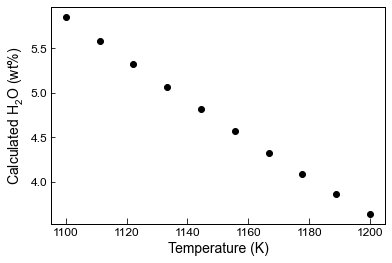

In [11]:
plt.plot(T_lin, H_Waters, 'ok')
plt.xlabel('Temperature (K)')
plt.ylabel('Calculated H$_2$O (wt%)')

### Example 2e - Using Thermobar's built in functions for iterating T and H

- Here we show how to iterate temperature using equation 23 from Putirka (2008), and H2O from Waters and Lange 2015.
- This function returns a dictionary. This contains calculated Temps and H2O contents with equilibrium tests as 1 dataframe, and the change in T and H2O with # of iterations as the second dataframe.
- The first dataframe, key "T_H_calc", contains columns for Delta T (last 2 iterations), which tells you the change in temp between the final and penultimate calculation step. Same for Delta H. If these numbers are not small, it might be worth inpecting the second dataframe, which shows the evolution of T and H with time. This can help you select the number of iterations. 

In [12]:
dict_HT=pt.calculate_fspar_liq_temp_hygr(liq_comps=Liqs_PL, plag_comps=Plags, 
        equationT="T_Put2008_eq23", equationH="H_Waters2015", P=5, iterations=30)


Calc_T_H=dict_HT['T_H_calc'] # Extracts calculated T and H2O
T_H_Iter=dict_HT['T_H_Evolution'] # Extracts EVolution of T and H against pressure

In [14]:
# These are the results
Calc_T_H.head()

,# of iterations,T_K_calc,Delta T (last 2 iters),H2O_calc,Delta H (last 2 iters),Pass An-Ab Eq Test Put2008?,Delta_An,Delta_Ab,Delta_Or,Pred_An_EqE,Pred_Ab_EqF,Pred_Or_EqG,Obs_Kd_Ab_An,SiO2_Plag,TiO2_Plag,Al2O3_Plag,FeOt_Plag,MnO_Plag,MgO_Plag,CaO_Plag,Na2O_Plag,K2O_Plag,Cr2O3_Plag,Sample_ID_Plag,Si_Plag_cat_prop,Mg_Plag_cat_prop,Fet_Plag_cat_prop,Ca_Plag_cat_prop,Al_Plag_cat_prop,Na_Plag_cat_prop,K_Plag_cat_prop,Mn_Plag_cat_prop,Ti_Plag_cat_prop,Cr_Plag_cat_prop,sum,Si_Plag_cat_frac,Mg_Plag_cat_frac,Fet_Plag_cat_frac,Ca_Plag_cat_frac,Al_Plag_cat_frac,Na_Plag_cat_frac,K_Plag_cat_frac,Mn_Plag_cat_frac,Ti_Plag_cat_frac,Cr_Plag_cat_frac,An_Plag,Ab_Plag,Or_Plag,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,Cr2O3_Liq_mol_frac,Si_Liq_cat_frac,Mg_Liq_cat_frac,Mn_Liq_cat_frac,Fet_Liq_cat_frac,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Cr_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,P,T
0,30,1417.964612,0.000004,-0.229984,-8.279212e-08,High T: No,0.108250,0.161148,0.029102,0.525378,0.392509,0.000113,0.510102,57.3,0.09,26.6,0.43,0.0,0.03,8.33,6.11,0.49,0.0,0,0.953660,0.000744,0.005985,0.148545,0.521768,0.197164,0.010404,0.0,0.001127,0.0,1.839397,0.518464,0.000405,0.003254,0.080757,0.283663,0.107189,0.005656,0.0,0.000613,0.0,0.417129,0.553656,0.029215,49.1,3.22,14.4,14.8,0.14,3.20,6.72,3.34,1.70,0.0,1.13,0.0,0.0,0.0,0.0,0.0,0,0.549988,0.053436,0.001328,0.138640,0.080652,0.095052,0.036269,0.012146,0.027130,0.005358,0.0,0.478739,0.046513,0.001156,0.120680,0.070204,0.165477,0.063141,0.021146,0.023616,0.009328,0.0,0.278194,0.278194,5,1417.964609
1,30,1403.727030,-0.000007,0.464469,1.752394e-07,High T: No,0.074873,0.083416,0.027979,0.527997,0.435127,0.000353,0.455475,56.5,0.12,26.9,0.47,0.0,0.05,8.95,5.66,0.47,0.0,1,0.940345,0.001241,0.006542,0.159601,0.527653,0.182643,0.009979,0.0,0.001502,0.0,1.829506,0.513989,0.000678,0.003576,0.087237,0.288413,0.099832,0.005455,0.0,0.000821,0.0,0.453125,0.518543,0.028332,49.2,3.89,15.3,13.7,0.12,3.88,6.76,3.44,1.22,0.0,0.83,0.0,0.0,0.0,0.0,0.0,1,0.545500,0.064131,0.001127,0.127030,0.080306,0.099965,0.036975,0.008628,0.032442,0.003896,0.0,0.474569,0.055792,0.000980,0.110512,0.069864,0.173933,0.064334,0.015012,0.028224,0.006778,0.0,0.335475,0.335475,5,1403.727038
2,30,1386.373565,-0.000013,0.790049,3.226131e-07,High T: No,0.092285,0.074881,0.022872,0.510546,0.483422,0.000564,0.500004,57.6,0.11,26.3,0.50,0.0,0.07,8.50,6.27,0.40,0.0,2,0.958653,0.001737,0.006959,0.151576,0.515884,0.202327,0.008493,0.0,0.001377,0.0,1.847006,0.519031,0.000940,0.003768,0.082066,0.279308,0.109543,0.004598,0.0,0.000746,0.0,0.418261,0.558303,0.023435,49.6,3.79,15.8,13.0,0.14,4.26,6.59,3.65,1.04,0.0,0.63,0.0,0.0,0.0,0.0,0.0,2,0.547269,0.070071,0.001308,0.119955,0.077907,0.102731,0.039042,0.007319,0.031455,0.002943,0.0,0.475045,0.060823,0.001136,0.104124,0.067626,0.178348,0.067779,0.012707,0.027304,0.005108,0.0,0.368736,0.368736,5,1386.373578
3,30,1481.986125,0.000027,-2.139884,-5.628982e-07,High T: No,0.086294,0.117287,0.049636,0.534934,0.384383,0.000055,0.461028,57.2,0.16,27.0,0.62,0.0,0.06,9.03,5.58,0.84,0.0,3,0.951996,0.001489,0.008630,0.161027,0.529614,0.180061,0.017835,0.0,0.002003,0.0,1.852655,0.513855,0.000804,0.004658,0.086917,0.285868,0.097191,0.009627,0.0,0.001081,0.0,0.448640,0.501670,0.049691,47.1,4.21,12.0,17.8,0.18,3.40,7.28,2.93,2.02,0.0,2.32,0.0,0.0,0.0,0.0,0.0,3,0.521269,0.056096,0.001687,0.164747,0.086327,0.078262,0.031436,0.014260,0.035047,0.010869,0.0,0.459338,0.049431,0.001487,0.145174,0.076070,0.137927,0.055402,0.025132,0.030883,0.019156,0.0,0.254001,0.254001,5,1481.986099
4,30,1442.673949,0.000017,-1.155612,-3.667844e-07,High T: Yes,0.011269,0.026814,0.027968,0.481241,0.47482

In [15]:
# This looks at the evolution of T and H to help you work out if you have selected enuogh iterations
T_H_Iter.head()

,Iteration,Sample_0_H_calc,Sample_1_T_calc,Sample_1_H_calc,Sample_2_T_calc,Sample_2_H_calc,Sample_3_T_calc,Sample_3_H_calc,Sample_4_T_calc,Sample_4_H_calc,Sample_5_T_calc,Sample_5_H_calc,Sample_6_T_calc,Sample_6_H_calc,Sample_7_T_calc,Sample_7_H_calc,Sample_8_T_calc,Sample_8_H_calc,Sample_9_T_calc,Sample_9_H_calc,Sample_10_T_calc,Sample_10_H_calc,Sample_11_T_calc,Sample_11_H_calc,Sample_12_T_calc,Sample_12_H_calc,Sample_13_T_calc,Sample_13_H_calc,Sample_14_T_calc,Sample_14_H_calc,Sample_15_T_calc,Sample_15_H_calc,Sample_16_T_calc,Sample_16_H_calc,Sample_17_T_calc,Sample_17_H_calc,Sample_18_T_calc,Sample_18_H_calc,Sample_19_T_calc,Sample_19_H_calc,Sample_20_T_calc,Sample_20_H_calc,Sample_21_T_calc,Sample_21_H_calc,Sample_22_T_calc,Sample_22_H_calc,Sample_23_T_calc,Sample_23_H_calc,Sample_24_T_calc,Sample_24_H_calc,Sample_25_T_calc,Sample_25_H_calc,Sample_26_T_calc,Sample_26_H_calc,Sample_27_T_calc,Sample_27_H_calc,Sample_0_T_calc
0,0.0,-0.087322,1416.126478,0.176491,1407.113949,0.299199,1421.667041,-0.818119,1411.109458,-0.439779,1410.227538,-0.203387,1412.721774,-0.060597,1413.356763,0.112622,1397.428945,-0.217659,1404.854023,-0.165124,1413.039645,-0.167563,1416.609140,-0.191621,1481.766938,-0.359261,1467.385079,-0.588008,1513.765265,0.069490,1488.133042,-0.244081,1478.992697,-0.242585,1467.511455,-0.350064,1462.011805,-0.384360,1519.824304,-0.051396,1509.044859,-0.155080,1484.425069,-0.224469,1472.185803,-0.302052,1460.413509,-0.386713,1321.919610,1.882819,1336.049868,1.548647,1304.244873,1.521361,1326.074637,1.602497,1411.778771
1,1.0,-0.141517,1411.393983,0.285806,1399.199728,0.484783,1444.255318,-1.326025,1422.987760,-0.712887,1415.687603,-0.329652,1414.347558,-0.098163,1410.344126,0.182399,1403.174626,-0.352941,1409.241640,-0.267443,1417.533106,-0.271133,1421.772447,-0.309977,1492.252094,-0.578185,1484.372965,-0.948083,1511.700385,0.111149,1495.262110,-0.391997,1486.022650,-0.390258,1477.558871,-0.563993,1473.010486,-0.620150,1521.357126,-0.082002,1513.651827,-0.248197,1490.953551,-0.360655,1480.881787,-0.486204,1471.437570,-0.623559,1278.980019,3.055367,1299.890378,2.509892,1270.176881,2.470795,1289.118452,2.600583,1414.122280
2,2.0,-0.175135,1408.475586,0.353584,1394.327257,0.600088,1458.573558,-1.639829,1430.447364,-0.882081,1419.094746,-0.407950,1415.356956,-0.121443,1408.482845,0.225658,1406.765776,-0.436934,1411.971899,-0.330791,1420.322302,-0.335092,1424.977026,-0.383003,1498.695156,-0.711193,1494.921953,-1.167561,1510.464419,0.136139,1499.605914,-0.481434,1490.325973,-0.479968,1483.749302,-0.694357,1479.820179,-0.764379,1522.270919,-0.100219,1516.427424,-0.304025,1494.934255,-0.443109,1486.220315,-0.598189,1478.251302,-0.768182,1253.512996,3.788743,1278.342768,3.108561,1249.747642,3.064960,1267.043902,3.224531,1415.579912
3,3.0,-0.195982,1406.671059,0.395634,1391.314069,0.671797,1467.532161,-1.833055,1435.100404,-0.986727,1421.214264,-0.456469,1415.983083,-0.135867,1407.330942,0.252487,1409.003100,-0.489046,1413.666671,-0.369990,1422.049225,-0.374566,1426.960096,-0.428028,1502.629766,-0.791857,1501.406698,-1.300949,1509.723685,0.151136,1502.241063,-0.535438,1492.949027,-0.534396,1487.540317,-0.773656,1484.009011,-0.852441,1522.815159,-0.111058,1518.094963,-0.337467,1497.351733,-0.492970,1489.480364,-0.666180,1482.434928,-0.856321,1238.065864,4.248277,1265.263802,3.481886,1237.276058,3.437330,1253.603001,3.615209,1416.485333
4,4.0,-0.208907,1405.553425,0.421732,1389.445586,0.716421,1473.091196,-1.951775,1437.990416,-1.051382,1422.530218,-0.486520,1416.371245,-0.144802,1406.617307,0.269131,1410.394166,-0.521363,1414.717064,-0.394238,1423.116751,-0.398920,1428.185019,-0.455778,1505.023456,-0.840724,1505.368483,-1.381876,1509.279416,0.160138,1503.835437,-0.568021,1494.543747,-0.567392,1489.853308,-0.821840,1486.575379,-0.906149,1523.139118,-0.117506,1519.095122,-0.357490,1498.816290,-0.523098,1491.464716,-0.707419,1484.993191,-0.909973,1228.568313,4.536554,1257.236758,3.714855,1229.578810,3.670919,1245.323619,3.860057

- In this instance, we can be relatively confident that we converge on a solution, based on the small Delta T and Delta H values between 10 and 15 iterations

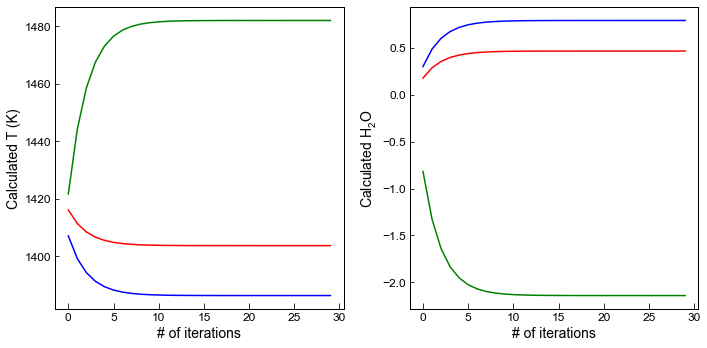

In [17]:
fig, (ax2, ax3) = plt.subplots(1, 2, figsize=(10,5))

ax2.plot(T_H_Iter['Iteration'], T_H_Iter['Sample_1_T_calc'], '-r', label='Sample 1')
ax2.plot(T_H_Iter['Iteration'], T_H_Iter['Sample_2_T_calc'], '-b', label='Sample 2')
ax2.plot(T_H_Iter['Iteration'], T_H_Iter['Sample_3_T_calc'], '-g', label='Sample 3')

ax2.set_ylabel('Calculated T (K)')
ax2.set_xlabel('# of iterations')

ax3.plot(T_H_Iter['Iteration'], T_H_Iter['Sample_1_H_calc'], '-r', label='Sample 1')
ax3.plot(T_H_Iter['Iteration'], T_H_Iter['Sample_2_H_calc'], '-b', label='Sample 2')
ax3.plot(T_H_Iter['Iteration'], T_H_Iter['Sample_3_H_calc'], '-g', label='Sample 3')

ax3.set_ylabel('Calculated H$_2$O')
ax3.set_xlabel('# of iterations')

plt.tight_layout()

## or plot all samples....

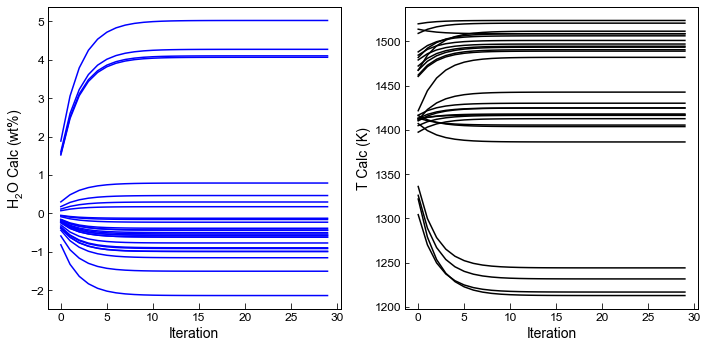

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
# Iterates over # of samples
for i in range(0, len(Calc_T_H)):
    ax1.plot(T_H_Iter['Iteration'], T_H_Iter['Sample_{}_H_calc'.format(i)], '-b' )
    ax2.plot(T_H_Iter['Iteration'], T_H_Iter['Sample_{}_T_calc'.format(i)], '-k' )

ax1.set_xlabel('Iteration')
ax1.set_ylabel('H$_2$O Calc (wt%)')
ax2.set_ylabel('T Calc (K)')
ax2.set_xlabel('Iteration')
fig.tight_layout()

## Example 5 - How sensitive is Plag-Liq hygrometry and thermometry to pressure

In [21]:
# Consider 10 pressures evenly spaced between 0 and 13 kbar
P_lin=np.linspace(0, 13, 10)

# Empty, ready to fill with calculated H2O contents
HP_Waters=np.empty([len(P_lin)], dtype=float) 
 # Empty, ready to fill with calculated temperatures contents
T_Put=np.empty([len(P_lin)], dtype=float)

for i in range(0, len(P_lin)):
    import warnings as w
    with w.catch_warnings():
        w.simplefilter('ignore')
        # Calculate H2O
        HP_Waters[i]=pt.calculate_fspar_liq_hygr(liq_comps=Liqs_PL.iloc[[0]], plag_comps=Plags.iloc[[0]], 
                                            equationH="H_Waters2015", T=1200, P=P_lin[i]).H2O_calc    
        # Calculate temperature
        T_Put[i]=pt.calculate_fspar_liq_temp(liq_comps=Liqs_PL.iloc[[0]], plag_comps=Plags.iloc[[0]], 
                                            equationT="T_Put2008_eq23", P=P_lin[i])   
  

Text(0, 0.5, 'H$_2$O Calc')

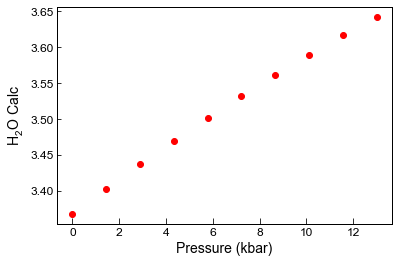

In [24]:
plt.plot(P_lin, HP_Waters, 'or')
plt.xlabel('Pressure (kbar)')
plt.ylabel('H$_2$O Calc')

Text(0, 0.5, 'H$_2$O Calc')

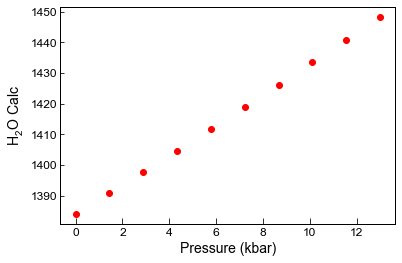

In [26]:
plt.plot(P_lin, T_Put, 'or')
plt.xlabel('Pressure (kbar)')
plt.ylabel('H$_2$O Calc')